In [10]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## No hidden layers model

In [2]:
epochs = pickle.load(open('./HPC/epochs_nohidden.pkl','rb'))
trainacc = pickle.load(open('./HPC/trainacc_nohidden.pkl','rb'))
testacc = pickle.load(open('./HPC/testacc_nohidden.pkl','rb'))

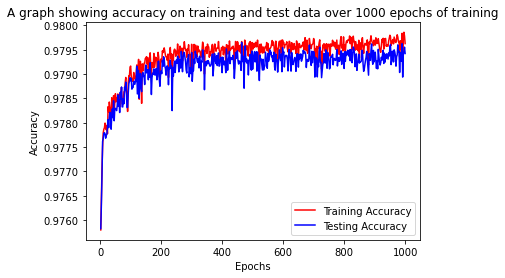

In [7]:
plt.plot(epochs, trainacc, color = 'r',label="Training Accuracy")
plt.plot(epochs, testacc, color='b',label="Testing Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('A graph showing accuracy on training and test data over 1000 epochs of training')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score
import seaborn as sn

In [13]:
Y_pred = pickle.load(open('Y_predictions.pkl','rb'))
Y_test_c = pickle.load(open("Y_test_c.pkl","rb"))

In [16]:
a = confusion_matrix(Y_test_c, Y_pred)

<AxesSubplot:>

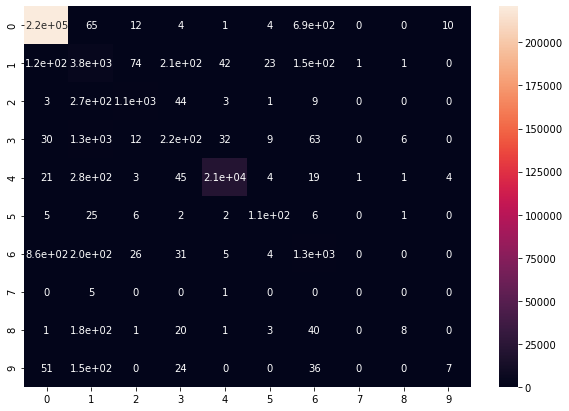

In [17]:
plt.figure(figsize = (10,7))
sn.heatmap(a, annot=True)

In [19]:
def classification_eval(predictions, actual):
    
    dec = np.int64(np.ceil(np.log10(len(actual))))
    
    print("Confusion Matrix")
    print(confusion_matrix(actual,predictions),'\n')
    
    print('Classification report')
    print(classification_report(actual, predictions, digits=dec))
    
    print("Scalar Metrics")
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(actual, predictions)))
    

In [20]:
classification_eval(Y_pred,Y_test_c)

Confusion Matrix
[[220984     65     12      4      1      4    692      0      0     10]
 [   117   3795     74    211     42     23    147      1      1      0]
 [     3    274   1077     44      3      1      9      0      0      0]
 [    30   1277     12    218     32      9     63      0      6      0]
 [    21    275      3     45  21269      4     19      1      1      4]
 [     5     25      6      2      2    113      6      0      1      0]
 [   859    205     26     31      5      4   1307      0      0      0]
 [     0      5      0      0      1      0      0      0      0      0]
 [     1    176      1     20      1      3     40      0      8      0]
 [    51    151      0     24      0      0     36      0      0      7]] 

Classification report
              precision    recall  f1-score   support

           0   0.995105  0.996447  0.995776    221772
           1   0.607394  0.860349  0.712074      4411
           2   0.889348  0.763288  0.821510      1411
           